In [1]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Perceptrons

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

y_pred

C:\Users\MarcosMuto\AppData\Local\Temp\ipykernel_42332\1984047067.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


array([1])

In [7]:
y_pred[0]

1

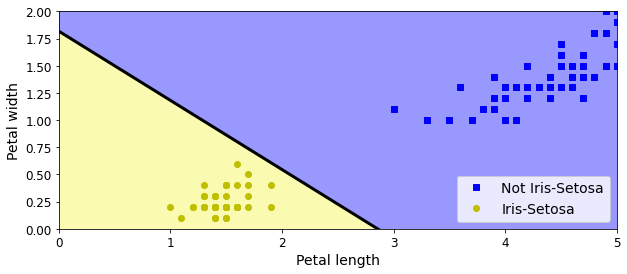

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

## Funções de Ativação

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

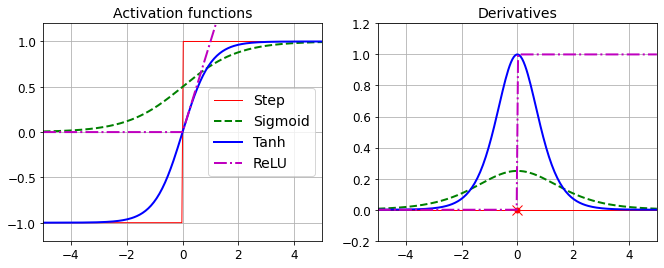

In [15]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [11]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

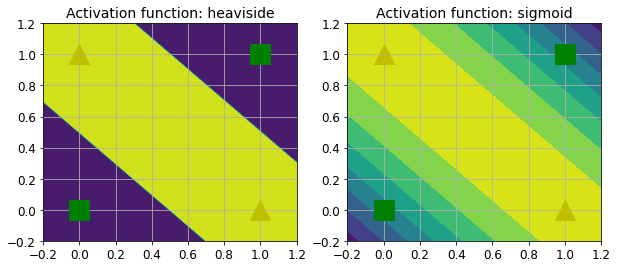

In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Gerando um classificador de imagens

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.10.0'

In [4]:
keras.__version__

'2.10.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

Criando um dataset de validacao e escalonando as imagens

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

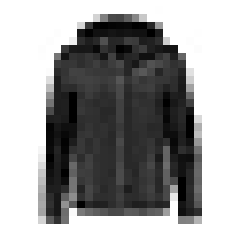

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

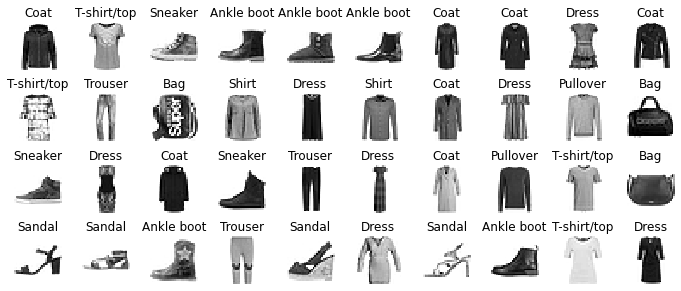

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Criando o modelo

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

outra forma e passar direto as camadas hidden e de saida como array

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Visualizando o modelo

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.0530566 , -0.03151176,  0.03086779, ..., -0.05697815,
         0.05974464,  0.03625771],
       [ 0.04485114, -0.07216386,  0.00663885, ..., -0.05204735,
         0.0569911 ,  0.043234  ],
       [-0.02929155,  0.05211002, -0.02083238, ..., -0.05943327,
         0.03148247, -0.03162922],
       ...,
       [-0.0683655 ,  0.06442663,  0.02459078, ...,  0.06215933,
        -0.02309942,  0.01930806],
       [-0.0441298 ,  0.05625612, -0.02089462, ..., -0.02837505,
         0.05111822, -0.00058968],
       [-0.02333851, -0.0034967 ,  0.00764968, ...,  0.06447364,
         0.03483728,  0.05339865]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7128 - accuracy: 0.7680 - val_loss: 0.5160 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4850 - accuracy: 0.8295 - val_loss: 0.4359 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4421 - accuracy: 0.8440 - val_loss: 0.5253 - val_accuracy: 0.8036
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4159 - accuracy: 0.8545 - val_loss: 0.3984 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3971 - accuracy: 0.8615 - val_loss: 0.3812 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8665 - val_loss: 0.3770 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8704 - val_loss: 0.3691 - val_accuracy:

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

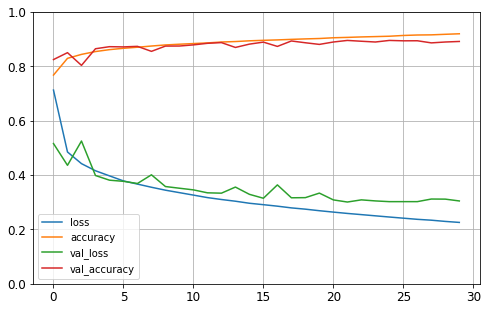

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 955us/step - loss: 0.3361 - accuracy: 0.8822


[0.3360738158226013, 0.8822000026702881]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 68ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 23ms/step


array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

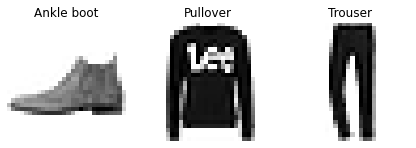

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Regressão

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1019 - val_loss: 0.7502
Epoch 2/20
363/363 [==============================] - 0s 974us/step - loss: 0.6971 - val_loss: 0.7343
Epoch 3/20
363/363 [==============================] - 0s 883us/step - loss: 0.6279 - val_loss: 0.7087
Epoch 4/20
363/363 [==============================] - 0s 898us/step - loss: 0.5973 - val_loss: 0.5632
Epoch 5/20
363/363 [==============================] - 0s 825us/step - loss: 0.5715 - val_loss: 0.5357
Epoch 6/20
363/363 [==============================] - 0s 953us/step - loss: 0.5484 - val_loss: 0.5933
Epoch 7/20
363/363 [==============================] - 0s 835us/step - loss: 0.5316 - val_loss: 0.5624
Epoch 8/20
363/363 [==============================] - 0s 901us/step - loss: 0.5169 - val_loss: 0.4894
Epoch 9/20
363/363 [==============================] - 0s 917us/step - loss: 0.5025 - val_loss: 0.5008
Epoch 10/20
363/363 [==============================] - 0s 922us/step - loss: 0.4908 

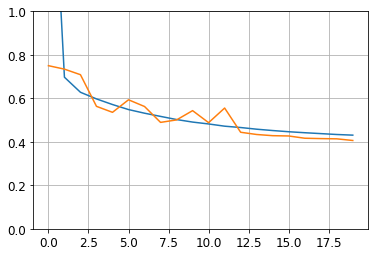

In [38]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
y_pred

array([[0.5942688],
       [1.6796949],
       [3.0599842]], dtype=float32)

In [40]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## Functional API

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [44]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 997us/step - loss: 1.6743 - val_loss: 0.9083
Epoch 2/20
363/363 [==============================] - 0s 782us/step - loss: 0.7845 - val_loss: 0.8041
Epoch 3/20
363/363 [==============================] - 0s 789us/step - loss: 0.7067 - val_loss: 0.6713
Epoch 4/20
363/363 [==============================] - 0s 814us/step - loss: 0.6559 - val_loss: 0.6059
Epoch 5/20
363/363 [==============================] - 0s 784us/step - loss: 0.6210 - val_loss: 0.5782
Epoch 6/20
363/363 [==============================] - 0s 787us/step - loss: 0.5914 - val_loss: 0.5561
Epoch 7/20
363/363 [==============================] - 0s 834us/step - loss: 0.5704 - val_loss: 0.5409
Epoch 8/20
363/363 [==============================] - 0s 878us/step - loss: 0.5528 - val_loss: 0.5191
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: 0.5367 - val_loss: 0.4958
Epoch 10/20
363/363 [==============================] - 0s 784us/step - loss: 0.523

In [45]:
y_pred

array([[0.38138002],
       [1.5854086 ],
       [3.0119457 ]], dtype=float32)

In [46]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [49]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1642 - val_loss: 1.2971
Epoch 2/20
363/363 [==============================] - 0s 829us/step - loss: 0.7714 - val_loss: 0.6857
Epoch 3/20
363/363 [==============================] - 0s 842us/step - loss: 0.6623 - val_loss: 0.6306
Epoch 4/20
363/363 [==============================] - 0s 829us/step - loss: 0.6121 - val_loss: 0.5736
Epoch 5/20
363/363 [==============================] - 0s 796us/step - loss: 0.5783 - val_loss: 0.5421
Epoch 6/20
363/363 [==============================] - 0s 819us/step - loss: 0.5514 - val_loss: 0.5242
Epoch 7/20
363/363 [==============================] - 0s 860us/step - loss: 0.5295 - val_loss: 0.5114
Epoch 8/20
363/363 [==============================] - 0s 870us/step - loss: 0.5114 - val_loss: 0.4767
Epoch 9/20
363/363 [==============================] - 0s 878us/step - loss: 0.4959 - val_loss: 0.4650
Epoch 10/20
363/363 [==============================] - 0s 907us/step - loss: 0.4834 

In [50]:
y_pred

array([[0.53347546],
       [1.9007968 ],
       [3.3450027 ]], dtype=float32)

In [53]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

Regularizando utilizando uma segunda cadada de aux output 

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [55]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [56]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.9195 - main_output_loss: 2.5851 - aux_output_loss: 5.9289 - val_loss: 1.4530 - val_main_output_loss: 1.0896 - val_aux_output_loss: 4.7233
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1839 - main_output_loss: 0.8749 - aux_output_loss: 3.9642 - val_loss: 1.0638 - val_main_output_loss: 0.7724 - val_aux_output_loss: 3.6867
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9013 - main_output_loss: 0.7112 - aux_output_loss: 2.6120 - val_loss: 1.0407 - val_main_output_loss: 0.7339 - val_aux_output_loss: 3.8013
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7809 - main_output_loss: 0.6541 - aux_output_loss: 1.9225 - val_loss: 0.9934 - val_main_output_loss: 0.6411 - val_aux_output_loss: 4.1645
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7110 - main_output_loss: 0.6148 - aux_output_loss: 1.5762 - val_loss

In [57]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 43ms/step


In [58]:
y_pred_main

array([[0.3031862],
       [2.0003953],
       [3.0904932]], dtype=float32)

In [59]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## Subclassing API

In [60]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [61]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.9227 - output_1_loss: 2.5284 - output_2_loss: 6.4712 - val_loss: 2.1455 - val_output_1_loss: 1.3495 - val_output_2_loss: 9.3089
Epoch 2/10
363/363 [==============================] - 0s 976us/step - loss: 1.2009 - output_1_loss: 0.8385 - output_2_loss: 4.4632 - val_loss: 1.1212 - val_output_1_loss: 0.7051 - val_output_2_loss: 4.8667
Epoch 3/10
363/363 [==============================] - 0s 981us/step - loss: 0.9157 - output_1_loss: 0.6821 - output_2_loss: 3.0176 - val_loss: 0.8410 - val_output_1_loss: 0.6206 - val_output_2_loss: 2.8252
Epoch 4/10
363/363 [==============================] - 0s 952us/step - loss: 0.7813 - output_1_loss: 0.6238 - output_2_loss: 2.1987 - val_loss: 0.7042 - val_output_1_loss: 0.5712 - val_output_2_loss: 1.9012
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7030 - output_1_loss: 0.5867 - output_2_loss: 1.7490 - val_loss: 0.6373 - val_output_1_loss: 0.5362 - 

## Salvando e estaurando um modelo

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 962us/step - loss: 1.7165 - val_loss: 0.7909
Epoch 2/10
363/363 [==============================] - 0s 788us/step - loss: 0.6431 - val_loss: 0.6460
Epoch 3/10
363/363 [==============================] - 0s 800us/step - loss: 0.5679 - val_loss: 0.5985
Epoch 4/10
363/363 [==============================] - 0s 873us/step - loss: 0.5360 - val_loss: 0.5367
Epoch 5/10
363/363 [==============================] - 0s 841us/step - loss: 0.5130 - val_loss: 0.4938
Epoch 6/10
363/363 [==============================] - 0s 867us/step - loss: 0.4935 - val_loss: 0.4698
Epoch 7/10
363/363 [==============================] - 0s 841us/step - loss: 0.4779 - val_loss: 0.4520
Epoch 8/10
363/363 [==============================] - 0s 869us/step - loss: 0.4648 - val_loss: 0.4377
Epoch 9/10
363/363 [==============================] - 0s 888us/step - loss: 0.4539 - val_loss: 0.4267
Epoch 10/10
162/162 [==============================] - 0s 588us/step - loss: 0.425

In [65]:
model.save("my_keras_model.h5")

In [66]:
model = keras.models.load_model("my_keras_model.h5")

In [67]:
model.predict(X_new)

1/1 [==============================] - 0s 50ms/step


array([[0.7093915],
       [1.4102304],
       [3.2974882]], dtype=float32)

In [68]:
model.save_weights("my_keras_weights.ckpt")

In [69]:
model.load_weights("my_keras_weights.ckpt")

## Utilizando Callbacks durante o treinamento

In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.6084 - val_loss: 1.1729
Epoch 2/10
363/363 [==============================] - 0s 834us/step - loss: 0.7098 - val_loss: 0.6790
Epoch 3/10
363/363 [==============================] - 0s 835us/step - loss: 0.6508 - val_loss: 0.5994
Epoch 4/10
363/363 [==============================] - 0s 848us/step - loss: 0.6076 - val_loss: 0.5606
Epoch 5/10
363/363 [==============================] - 0s 820us/step - loss: 0.5706 - val_loss: 0.5241
Epoch 6/10
363/363 [==============================] - 0s 807us/step - loss: 0.5379 - val_loss: 0.4950
Epoch 7/10
363/363 [==============================] - 0s 875us/step - loss: 0.5120 - val_loss: 0.4703
Epoch 8/10
363/363 [==============================] - 0s 885us/step - loss: 0.4921 - val_loss: 0.4519
Epoch 9/10
363/363 [==============================] - 0s 832us/step - loss: 0.4758 - val_loss: 0.4365
Epoch 10/10
162/162 [==============================] - 0s 602us/step - loss: 0.4489


In [73]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 980us/step - loss: 0.4523 - val_loss: 0.4188
Epoch 2/100
363/363 [==============================] - 0s 837us/step - loss: 0.4436 - val_loss: 0.4171
Epoch 3/100
363/363 [==============================] - 0s 879us/step - loss: 0.4364 - val_loss: 0.4080
Epoch 4/100
363/363 [==============================] - 0s 840us/step - loss: 0.4302 - val_loss: 0.4189
Epoch 5/100
363/363 [==============================] - 0s 789us/step - loss: 0.4253 - val_loss: 0.4086
Epoch 6/100
363/363 [==============================] - 0s 783us/step - loss: 0.4208 - val_loss: 0.4085
Epoch 7/100
363/363 [==============================] - 0s 786us/step - loss: 0.4169 - val_loss: 0.4137
Epoch 8/100
363/363 [==============================] - 0s 902us/step - loss: 0.4137 - val_loss: 0.4014
Epoch 9/100
363/363 [==============================] - 0s 818us/step - loss: 0.4105 - val_loss: 0.3991
Epoch 10/100
363/363 [==============================] - 0s 792us/step - l

In [74]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [75]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

322/363 [=========================>....] - ETA: 0s - loss: 0.3605
val/train: 1.00
363/363 [==============================] - 0s 893us/step - loss: 0.3610 - val_loss: 0.3611


# Tensorboard

In [76]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [77]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_09_21-16_39_44'

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [80]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 2.0160 - val_loss: 4.9436
Epoch 2/30
363/363 [==============================] - 0s 889us/step - loss: 0.7296 - val_loss: 0.6300
Epoch 3/30
363/363 [==============================] - 0s 984us/step - loss: 0.6336 - val_loss: 0.5868
Epoch 4/30
363/363 [==============================] - 0s 908us/step - loss: 0.5986 - val_loss: 0.5894
Epoch 5/30
363/363 [==============================] - 0s 879us/step - loss: 0.5711 - val_loss: 0.5660
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5465 - val_loss: 0.5388
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5261 - val_loss: 0.5008
Epoch 8/30
363/363 [==============================] - 0s 837us/step - loss: 0.5081 - val_loss: 0.5158
Epoch 9/30
363/363 [==============================] - 0s 822us/step - loss: 0.4919 - val_loss: 0.4937
Epoch 10/30
363/363 [==============================] - 0s 821us/step - loss: 0.4774 - va

**Para rodar o tensor board**

Em um terminal:

tensorboard --logdir=./my_logs --port=6006

ou abaixo para rodar direto do jupyter

In [81]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [82]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_09_21-16_42_59'

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6212 - val_loss: 225.1648
Epoch 2/30
363/363 [==============================] - 0s 880us/step - loss: 0.5439 - val_loss: 6.7423
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.3212
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3533 - val_loss: 0.3749
Epoch 5/30
363/363 [==============================] - 0s 964us/step - loss: 0.3428 - val_loss: 0.3191
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4144 - val_loss: 0.3608
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3463 - val_loss: 0.3297
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3392 - val_loss: 0.3404
Epoch 9/30
363/363 [==============================] - 0s 948us/step - loss: 0.3306 - val_loss: 0.3083
Epoch 10/30
363/363 [==============================] - 0s 847us/step - loss: 0.3285 - val_lo

In [86]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



## Melhorando os hyperparametros

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [6]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\MarcosMuto\AppData\Local\Temp\ipykernel_12176\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [7]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1288 - val_loss: 0.6883
Epoch 2/100
363/363 [==============================] - 0s 952us/step - loss: 0.6035 - val_loss: 0.5485
Epoch 3/100
363/363 [==============================] - 0s 822us/step - loss: 0.5277 - val_loss: 0.4716
Epoch 4/100
363/363 [==============================] - 0s 817us/step - loss: 0.4829 - val_loss: 0.4452
Epoch 5/100
363/363 [==============================] - 0s 906us/step - loss: 0.4566 - val_loss: 0.4229
Epoch 6/100
363/363 [==============================] - 0s 849us/step - loss: 0.4391 - val_loss: 0.4263
Epoch 7/100
363/363 [==============================] - 0s 869us/step - loss: 0.4278 - val_loss: 0.4043
Epoch 8/100
363/363 [==============================] - 0s 859us/step - loss: 0.4198 - val_loss: 0.3928
Epoch 9/100
363/363 [==============================] - 0s 850us/step - loss: 0.4134 - val_loss: 0.4005
Epoch 10/100
363/363 [==============================] - 0s 905us/step - los

In [8]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 633us/step - loss: 0.3653


In [9]:
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 81ms/step


In [11]:
y_pred

array([0.57864773, 1.7861106 , 3.8436553 ], dtype=float32)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1958 - val_loss: 26.6983
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7267 - val_loss: 17.0958
Epoch 3/100
242/242 [==============================] - 0s 984us/step - loss: 0.9992 - val_loss: 0.6240
Epoch 4/100
242/242 [==============================] - 0s 952us/step - loss: 0.6353 - val_loss: 0.5432
Epoch 5/100
242/242 [==============================] - 0s 893us/step - loss: 0.5641 - val_loss: 0.4955
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.4698
Epoch 7/100
242/242 [==============================] - 0s 940us/step - loss: 0.4834 - val_loss: 0.4272
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4523 - val_loss: 0.4175
Epoch 9/100
242/242 [==============================] - 0s 926us/step - loss: 0.4480 - val_loss: 0.4176
Epoch 10/100
242/2

242/242 [==============================] - 0s 932us/step - loss: 0.4138 - val_loss: 0.3830
Epoch 32/100
242/242 [==============================] - 0s 969us/step - loss: 0.4145 - val_loss: 0.3834
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4130 - val_loss: 0.3838
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4117 - val_loss: 0.3817
Epoch 35/100
242/242 [==============================] - 0s 967us/step - loss: 0.4113 - val_loss: 0.3798
Epoch 36/100
242/242 [==============================] - 0s 972us/step - loss: 0.4108 - val_loss: 0.3797
Epoch 37/100
242/242 [==============================] - 0s 944us/step - loss: 0.4102 - val_loss: 0.3828
Epoch 38/100
242/242 [==============================] - 0s 901us/step - loss: 0.4090 - val_loss: 0.3865
Epoch 39/100
242/242 [==============================] - 0s 929us/step - loss: 0.4090 - val_loss: 0.3823
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.408

121/121 [==============================] - 0s 680us/step - loss: 0.4039
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=   9.0s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.0383 - val_loss: 12.6932
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6823 - val_loss: 4.1741
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4980 - val_loss: 0.4328
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4245 - val_loss: 0.3885
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4021 - val_loss: 0.3806
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3886 - val_loss: 0.4104
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3794 - val_loss: 0.3869
Epoch 8/100
242/242 [==============================] - 0s 989us/step - loss: 0.3719 - val_loss: 0.4134
Epoch 9/100
242/242 [=======

242/242 [==============================] - 0s 1ms/step - loss: 1.0407 - val_loss: 1.0893
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8816 - val_loss: 0.8231
Epoch 6/100
242/242 [==============================] - 0s 933us/step - loss: 0.8068 - val_loss: 0.7536
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7675 - val_loss: 0.7477
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7429 - val_loss: 0.7568
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7249 - val_loss: 0.7479
Epoch 10/100
242/242 [==============================] - 0s 978us/step - loss: 0.7097 - val_loss: 0.7576
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6965 - val_loss: 0.7563
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6844 - val_loss: 0.7287
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6727 - val_loss: 0

Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.3911
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4168 - val_loss: 0.3905
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4160 - val_loss: 0.3898
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4154 - val_loss: 0.3892
Epoch 88/100
242/242 [==============================] - 0s 946us/step - loss: 0.4148 - val_loss: 0.3887
Epoch 89/100
242/242 [==============================] - 0s 931us/step - loss: 0.4141 - val_loss: 0.3883
Epoch 90/100
242/242 [==============================] - 0s 979us/step - loss: 0.4135 - val_loss: 0.3874
Epoch 91/100
242/242 [==============================] - 0s 973us/step - loss: 0.4128 - val_loss: 0.3870
Epoch 92/100
242/242 [==============================] - 0s 963us/step - loss: 0.4122 - val_loss: 0.3864
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - lo

242/242 [==============================] - 0s 1ms/step - loss: 0.5318 - val_loss: 0.5138
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5282 - val_loss: 0.5105
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5247 - val_loss: 0.5063
Epoch 34/100
242/242 [==============================] - 0s 942us/step - loss: 0.5214 - val_loss: 0.5039
Epoch 35/100
242/242 [==============================] - 0s 974us/step - loss: 0.5181 - val_loss: 0.5001
Epoch 36/100
242/242 [==============================] - 0s 948us/step - loss: 0.5149 - val_loss: 0.5003
Epoch 37/100
242/242 [==============================] - 0s 957us/step - loss: 0.5119 - val_loss: 0.5000
Epoch 38/100
242/242 [==============================] - 0s 917us/step - loss: 0.5089 - val_loss: 0.4945
Epoch 39/100
242/242 [==============================] - 0s 933us/step - loss: 0.5060 - val_loss: 0.4918
Epoch 40/100
242/242 [==============================] - 0s 897us/step - loss: 0.503

242/242 [==============================] - 0s 977us/step - loss: 0.4571 - val_loss: 0.4222
Epoch 9/100
242/242 [==============================] - 0s 954us/step - loss: 0.4426 - val_loss: 0.4148
Epoch 10/100
242/242 [==============================] - 0s 962us/step - loss: 0.4311 - val_loss: 0.4046
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4215 - val_loss: 0.3970
Epoch 12/100
242/242 [==============================] - 0s 940us/step - loss: 0.4133 - val_loss: 0.3880
Epoch 13/100
242/242 [==============================] - 0s 932us/step - loss: 0.4062 - val_loss: 0.3857
Epoch 14/100
242/242 [==============================] - 0s 947us/step - loss: 0.4009 - val_loss: 0.4046
Epoch 15/100
242/242 [==============================] - 0s 946us/step - loss: 0.3954 - val_loss: 0.3930
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3912 - val_loss: 0.3911
Epoch 17/100
242/242 [==============================] - 0s 997us/step - loss: 0.38

242/242 [==============================] - 0s 965us/step - loss: 0.3139 - val_loss: 0.3141
Epoch 88/100
242/242 [==============================] - 0s 981us/step - loss: 0.3134 - val_loss: 0.3120
Epoch 89/100
242/242 [==============================] - 0s 952us/step - loss: 0.3133 - val_loss: 0.3139
Epoch 90/100
242/242 [==============================] - 0s 958us/step - loss: 0.3124 - val_loss: 0.3350
Epoch 91/100
242/242 [==============================] - 0s 975us/step - loss: 0.3129 - val_loss: 0.3228
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3120 - val_loss: 0.3166
Epoch 93/100
242/242 [==============================] - 0s 978us/step - loss: 0.3115 - val_loss: 0.3101
Epoch 94/100
242/242 [==============================] - 0s 994us/step - loss: 0.3115 - val_loss: 0.3091
Epoch 95/100
242/242 [==============================] - 0s 957us/step - loss: 0.3108 - val_loss: 0.3089
Epoch 96/100
242/242 [==============================] - 0s 986us/step - loss: 0

121/121 [==============================] - 0s 595us/step - loss: 0.3633
[CV] END learning_rate=0.0016535051383872363, n_hidden=2, n_neurons=70; total time=   9.0s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4546 - val_loss: 342.0162
Epoch 2/100
242/242 [==============================] - 0s 862us/step - loss: 2.6519 - val_loss: 690.1157
Epoch 3/100
242/242 [==============================] - 0s 938us/step - loss: 7.3522 - val_loss: 4509.9663
Epoch 4/100
242/242 [==============================] - 0s 868us/step - loss: 14.8247 - val_loss: 15241.6787
Epoch 5/100
242/242 [==============================] - 0s 965us/step - loss: 67.0373 - val_loss: 75583.4688
Epoch 6/100
242/242 [==============================] - 0s 913us/step - loss: 2806.9231 - val_loss: 329718.2500
Epoch 7/100
242/242 [==============================] - 0s 968us/step - loss: 3386.2329 - val_loss: 1486033.7500
Epoch 8/100
242/242 [==============================] - 0s 898us/step - loss: 49568.7

242/242 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3600
Epoch 16/100
242/242 [==============================] - 0s 996us/step - loss: 0.3474 - val_loss: 0.3556
Epoch 17/100
242/242 [==============================] - 0s 961us/step - loss: 0.3442 - val_loss: 0.3567
Epoch 18/100
242/242 [==============================] - 0s 969us/step - loss: 0.3427 - val_loss: 0.3589
Epoch 19/100
242/242 [==============================] - 0s 991us/step - loss: 0.3398 - val_loss: 0.3542
Epoch 20/100
242/242 [==============================] - 0s 943us/step - loss: 0.3382 - val_loss: 0.3525
Epoch 21/100
242/242 [==============================] - 0s 983us/step - loss: 0.3362 - val_loss: 0.3411
Epoch 22/100
242/242 [==============================] - 0s 970us/step - loss: 0.3350 - val_loss: 0.3463
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3326 - val_loss: 0.3329
Epoch 24/100
242/242 [==============================] - 0s 957us/step - loss: 0.3

Epoch 14/100
242/242 [==============================] - 0s 985us/step - loss: 0.3469 - val_loss: 0.6881
Epoch 15/100
121/121 [==============================] - 0s 627us/step - loss: 0.3634
[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=   4.1s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.2032 - val_loss: 0.7776
Epoch 2/100
242/242 [==============================] - 0s 985us/step - loss: 0.6092 - val_loss: 2.1140
Epoch 3/100
242/242 [==============================] - 0s 993us/step - loss: 0.5190 - val_loss: 1.3660
Epoch 4/100
242/242 [==============================] - 0s 942us/step - loss: 0.4803 - val_loss: 1.5170
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.7397
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4114 - val_loss: 0.6042
Epoch 7/100
242/242 [==============================] - 0s 939us/step - loss: 0.3988 - val_loss: 0.3685
Epoch 8/

242/242 [==============================] - 0s 1ms/step - loss: 1.5248 - val_loss: 11.5016
Epoch 2/100
242/242 [==============================] - 0s 959us/step - loss: 0.8377 - val_loss: 9.1048
Epoch 3/100
242/242 [==============================] - 0s 956us/step - loss: 0.6883 - val_loss: 2.0405
Epoch 4/100
242/242 [==============================] - 0s 955us/step - loss: 0.6086 - val_loss: 1.1695
Epoch 5/100
242/242 [==============================] - 0s 953us/step - loss: 0.5558 - val_loss: 0.5334
Epoch 6/100
242/242 [==============================] - 0s 921us/step - loss: 0.5270 - val_loss: 0.5222
Epoch 7/100
242/242 [==============================] - 0s 969us/step - loss: 0.5021 - val_loss: 0.4726
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.5023
Epoch 9/100
242/242 [==============================] - 0s 900us/step - loss: 0.4686 - val_loss: 0.5026
Epoch 10/100
242/242 [==============================] - 0s 904us/step - loss: 0.4568 - v

242/242 [==============================] - 0s 926us/step - loss: 0.4124 - val_loss: 0.3885
Epoch 19/100
242/242 [==============================] - 0s 921us/step - loss: 0.4102 - val_loss: 0.3896
Epoch 20/100
242/242 [==============================] - 0s 933us/step - loss: 0.4076 - val_loss: 0.3815
Epoch 21/100
242/242 [==============================] - 0s 948us/step - loss: 0.4058 - val_loss: 0.3820
Epoch 22/100
242/242 [==============================] - 0s 935us/step - loss: 0.4044 - val_loss: 0.3825
Epoch 23/100
242/242 [==============================] - 0s 903us/step - loss: 0.4024 - val_loss: 0.3738
Epoch 24/100
242/242 [==============================] - 0s 950us/step - loss: 0.4004 - val_loss: 0.3972
Epoch 25/100
242/242 [==============================] - 0s 919us/step - loss: 0.4000 - val_loss: 0.4465
Epoch 26/100
242/242 [==============================] - 0s 979us/step - loss: 0.3980 - val_loss: 0.3701
Epoch 27/100
242/242 [==============================] - 0s 994us/step - loss:

Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3093 - val_loss: 0.4373
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3062 - val_loss: 0.3255
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3059 - val_loss: 0.3636
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3038 - val_loss: 0.3685
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3012 - val_loss: 0.3800
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2991 - val_loss: 0.3043
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2983 - val_loss: 0.3236
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2964 - val_loss: 0.3103
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2942 - val_loss: 0.3515
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2923

242/242 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.3264
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3321
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3025 - val_loss: 0.3580
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3006 - val_loss: 0.3209
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2991 - val_loss: 0.2987
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2968 - val_loss: 0.3434
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2954 - val_loss: 0.2968
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2956 - val_loss: 0.3368
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2942 - val_loss: 0.2964
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2932 - val_loss: 

Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2993 - val_loss: 0.3160
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2964 - val_loss: 0.3109
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2959 - val_loss: 0.2978
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2948 - val_loss: 0.3044
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2930 - val_loss: 0.2962
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2906 - val_loss: 0.3528
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2902 - val_loss: 0.3005
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2899 - val_loss: 0.3431
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2881 - val_loss: 0.2922
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2860

242/242 [==============================] - 0s 1ms/step - loss: 0.2950 - val_loss: 0.3019
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2913 - val_loss: 0.3321
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2895 - val_loss: 0.2960
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2890 - val_loss: 0.3599
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2902 - val_loss: 0.2928
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2893 - val_loss: 0.3431
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2863 - val_loss: 0.3571
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2858 - val_loss: 0.3272
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2855 - val_loss: 0.2908
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2821 - val_loss: 

Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.3772
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3089 - val_loss: 0.3056
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3075 - val_loss: 0.3383
Epoch 47/100
242/242 [==============================] - 0s 985us/step - loss: 0.3059 - val_loss: 0.3246
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.3265
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3043 - val_loss: 0.3002
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3038 - val_loss: 0.4026
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3036 - val_loss: 0.3167
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3021 - val_loss: 0.3623
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.30

242/242 [==============================] - 0s 1ms/step - loss: 0.3132 - val_loss: 0.3780
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3122 - val_loss: 0.3063
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3119 - val_loss: 0.3147
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3854
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3469
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3083 - val_loss: 0.4089
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3086 - val_loss: 0.3519
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.3043
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3069 - val_loss: 0.3309
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3054 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000256E90C3280>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.005021425736625637,
                                                          0.0005703073595961105,
                                                          0.001151888789941251,
                                                          0.001621231156394198,
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.0032032448128444043,
                                                          0.004591455636549438,
                                                          0.0003715541189658278, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [13]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [14]:
rnd_search_cv.best_score_

-0.32192755738894147

In [15]:
rnd_search_cv.best_estimator_

In [16]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 755us/step - loss: 0.2963


-0.29629865288734436

In [17]:
model = rnd_search_cv.best_estimator_.model
model

In [18]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 668us/step - loss: 0.2963


0.29629865288734436

# Exercicios

10. Treinar um modelo no MNIST

In [19]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
X_train_full.shape

(60000, 28, 28)

In [21]:
X_train_full.dtype

dtype('uint8')

In [22]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

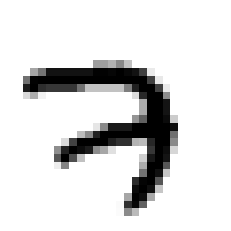

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [24]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
X_valid.shape

(5000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

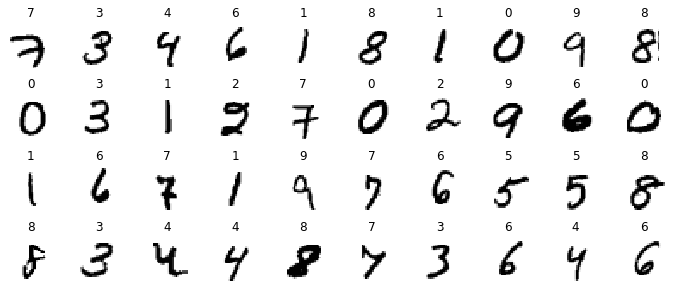

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [33]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.5934 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

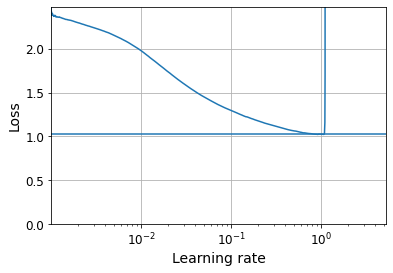

In [34]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [38]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9274 - val_loss: 0.1013 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9699 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0721 - val_accuracy: 0.9766
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.1036 - val_accuracy: 0.9726
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0719 - val_accuracy: 0.9814
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0612 - val_accuracy: 0.9824
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0751 - val_ac

In [40]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9820


[0.06851297616958618, 0.9819999933242798]

In [41]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
